<a href="https://colab.research.google.com/github/Shontom6/ML_Algorithms/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt


Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 385s 4s/step - accuracy: 0.6255 - loss: 0.7244 - val_accuracy: 0.8813 - val_loss: 0.2949
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.9152 - loss: 0.2241 - val_accuracy: 0.8525 - val_loss: 0.3557
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.9465 - loss: 0.1558 - val_accuracy: 0.9112 - val_loss: 0.2372
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.9537 - loss: 0.1208 - val_accuracy: 0.9013 - val_loss: 0.2391
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.9754 - loss: 0.0620 - val_accuracy: 0.8975 - val_loss: 0.2822
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.9746 - loss: 0.0639 - val_accuracy: 0.9212 - val_loss: 0.2335
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.9810 - loss: 0.0430 - val_accuracy: 0.9112 - val_loss: 0.3358
Epoch 8/10
100

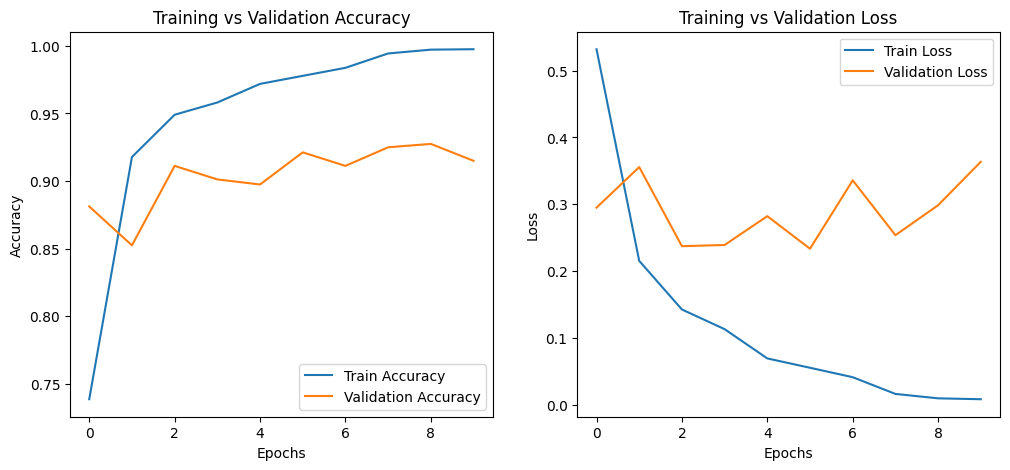

In [3]:

# Define dataset path
dataset_path = "/content/drive/MyDrive/Colab Notebooks/Car-Bike-Dataset"  # Update with actual path

# Image Data Generator
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Build CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (Car or Bike)
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot Accuracy & Loss Graphs
plt.figure(figsize=(12, 5))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# Show the plots
plt.show()

# Save the model for future use
model.save("car_bike_classifier.h5")